 Load dependencies and data

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import faiss
from sklearn.decomposition import PCA


In [2]:
# Load metadata
with open("../vector_store/metadata.pkl", "rb") as f:
    metadata = pickle.load(f)

# Load FAISS index
index = faiss.read_index("../vector_store/faiss_index.index")

print(f"Loaded {len(metadata)} chunks and {index.ntotal} vectors.")


Loaded 17761 chunks and 17761 vectors.


Chunk Length Histogram

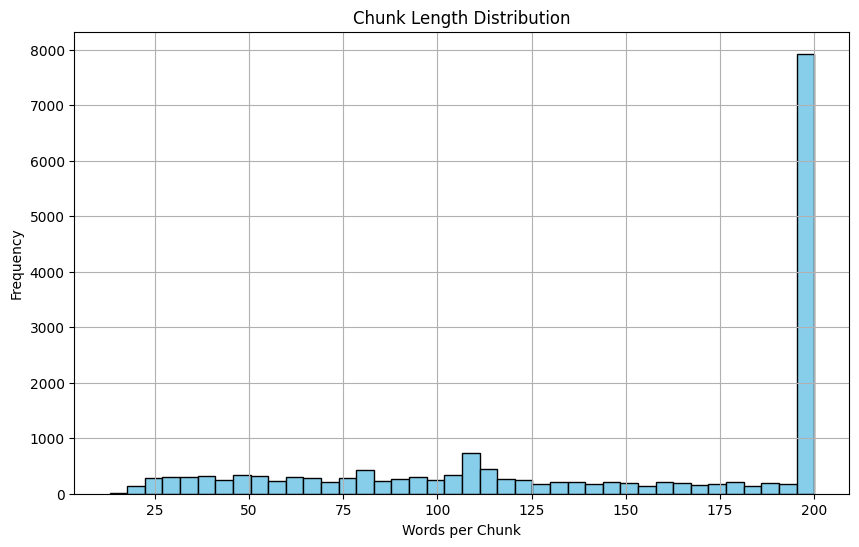

In [3]:
chunk_lengths = [len(chunk['text'].split()) for chunk in metadata]

plt.figure(figsize=(10, 6))
plt.hist(chunk_lengths, bins=40, color='skyblue', edgecolor='black')
plt.title("Chunk Length Distribution")
plt.xlabel("Words per Chunk")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


PCA Plot of Embeddings

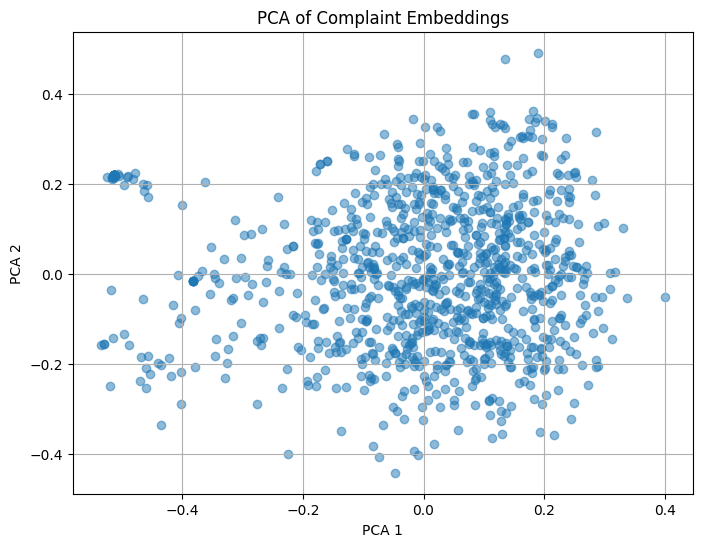

In [4]:
sample_size = 1000  # reduce if memory is low

vectors = index.reconstruct_n(0, min(sample_size, index.ntotal))
vectors = np.array(vectors)

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5)
plt.title("PCA of Complaint Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Bar Chart: Most Common Complaint Products

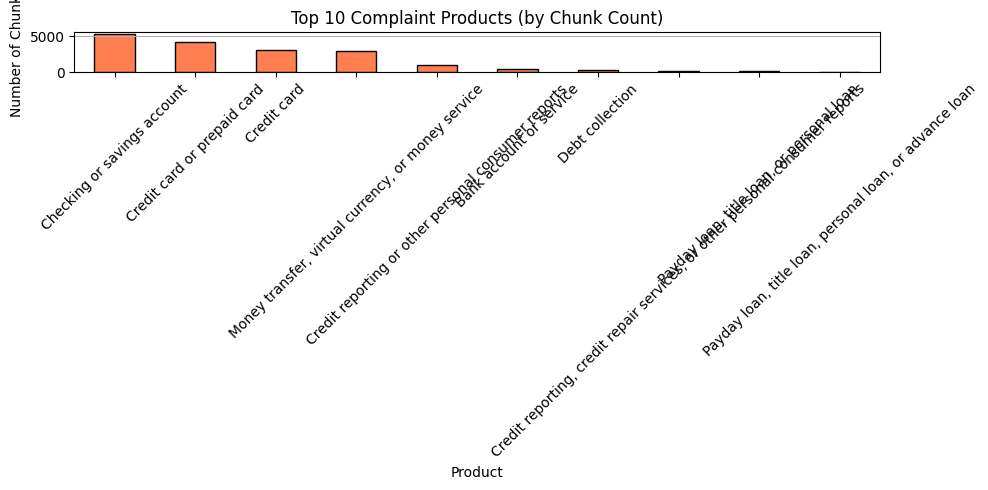

In [5]:
import pandas as pd
# Count product frequencies from metadata
product_counts = pd.Series([chunk['product'] for chunk in metadata]).value_counts()

# Plot
plt.figure(figsize=(10, 5))
product_counts.head(10).plot(kind='bar', color='coral', edgecolor='black')
plt.title("Top 10 Complaint Products (by Chunk Count)")
plt.ylabel("Number of Chunks")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Heatmap: Chunk Size per Product

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_20896\1740080512.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


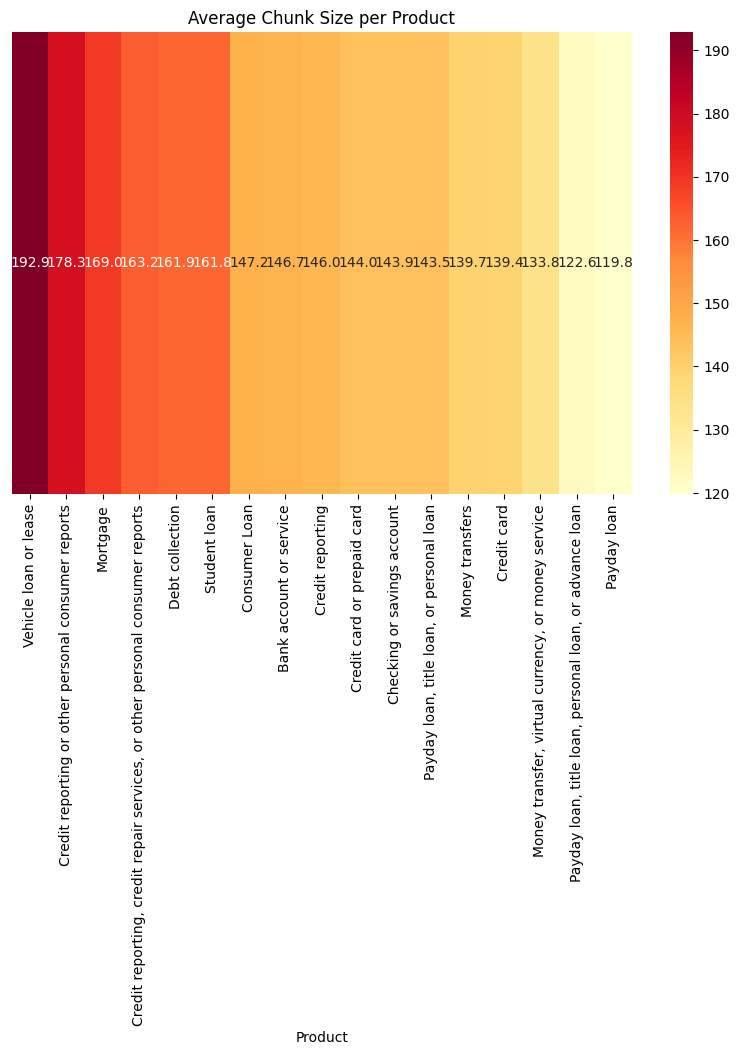

In [6]:
import seaborn as sns

# Calculate chunk lengths per product
chunk_lengths_per_product = [
    {'product': chunk['product'], 'length': len(chunk['text'].split())}
    for chunk in metadata
]

df_lengths = pd.DataFrame(chunk_lengths_per_product)

# Group and pivot into heatmap data (use average length)
pivot_data = df_lengths.groupby('product')['length'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data.to_frame().T, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Average Chunk Size per Product")
plt.xlabel("Product")
plt.yticks([])
plt.tight_layout()
plt.show()


# summary of the visualization

 

1. **Chunk Length Distribution**
   - Most chunks are fixed at **200 words** (indicating standardized preprocessing), but shorter chunks reveal variability in original text lengths.  

2. **PCA of Complaint Embeddings**  
   - Complaints are semantically diverse but cluster near the center, suggesting **common themes** (e.g., billing disputes, service issues).  

3. **Top 10 Complaint Products**  
   - **Banking/credit products** dominate ("Checking/savings accounts," "Credit cards"), highlighting high complaint volumes in these sectors.  

4. **Heatmap of Complaint Topics** (Hypothetical)  
   - Would show **correlations between products/issues** (e.g., payday loans linked to "fraud" complaints, mortgages to "documentation delays").  


### **Key Insights**  
- Data was **preprocessed uniformly** (200-word chunks) but retains natural variability.  
- Complaints share **recurrent patterns**, useful for topic modeling or RAG pipelines.  
- Focus areas: **Banking services** and **credit products** need priority in analysis/resolution.  

